## Real Gaussian Random Vector

### Definition and Properties

A real Gaussian random vector is a generalization of the scalar Gaussian random variable to multiple dimensions. Consider a random vector $\vec{\mathbf{x}} \in \mathbb{R}^n$ with the following properties:

- **Mean vector** $\vec{\mu} \in \mathbb{R}^n$
- **Covariance matrix** $\vec{C} \in \mathbb{R}^{n \times n}$

The probability density function (PDF) of a real Gaussian random vector $\vec{\mathbf{x}}$ is given by:

$$ f_{\vec{\mathbf{x}}}(\vec{x}) = \frac{1}{(2\pi)^{n/2} \sqrt{\det \vec{C}}} e^{-\frac{1}{2} (\vec{x} - \vec{\mu})^{\mathsf{T}} \vec{C}^{-1} (\vec{x} - \vec{\mu})} $$

### Components of the PDF

**Normalization Factor**: 

   $$
   \frac{1}{(2\pi)^{n/2} \sqrt{\det \vec{C}}}
   $$

   - $(2\pi)^{n/2}$ normalizes the multi-dimensional space.
   - $\sqrt{\det \vec{C}}$ accounts for the volume scaling introduced by the covariance matrix $\vec{C}$.

**Exponential Term**: 

   $$
   e^{-\frac{1}{2} (\vec{x} - \vec{\mu})^{\mathsf{T}} \vec{C}^{-1} (\vec{x} - \vec{\mu})}
   $$

   - $(\vec{x} - \vec{\mu})$ is the deviation of the vector from its mean.
   - $\vec{C}^{-1}$ is the inverse of the covariance matrix, which normalizes the deviation.
   - The quadratic form $(\vec{x} - \vec{\mu})^{\mathsf{T}} \vec{C}^{-1} (\vec{x} - \vec{\mu})$ represents the Mahalanobis distance, a measure of distance accounting for correlations among the variables.

### Mean Vector and Covariance Matrix

The mean vector $\vec{\mu}$ and covariance matrix $\vec{C}$ are defined as follows:

- **Mean Vector**:

  $$
  \vec{\mu} = E\{\vec{\mathbf{x}}\}
  $$

  This is the expected value of the random vector $\vec{\mathbf{x}}$.

- **Covariance Matrix**:

  $$
  \vec{C} = E\{(\vec{\mathbf{x}} - \vec{\mu})(\vec{\mathbf{x}} - \vec{\mu})^{\mathsf{T}}\}
  $$
  
  This measures the expected value of the outer product of the deviations of $\vec{\mathbf{x}}$ from its mean. The covariance matrix describes the spread and correlation structure of the vector components.

**Notation**

The notation $\vec{\mathbf{x}} \sim \mathcal{N}(\vec{\mu}, \vec{C})$ indicates that $\vec{\mathbf{x}}$ is a Gaussian random vector with mean vector $\vec{\mu}$ and covariance matrix $\vec{C}$.

Sample Mean:
 [0.96365268 2.06247167]
Sample Covariance:
 [[0.99984798 0.4338065 ]
 [0.4338065  1.88796622]]


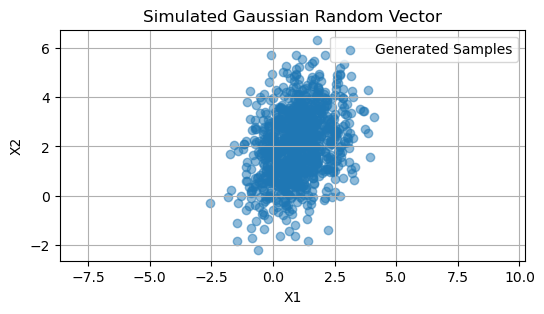

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Define the mean vector and covariance matrix
mu = np.array([1, 2])  # Example mean vector
C = np.array([[1, 0.5], [0.5, 2]])  # Example covariance matrix

# Number of samples to generate
num_samples = 1000

# Simulate the Gaussian random vector
samples = np.random.multivariate_normal(mu, C, num_samples)

# Verify the mean and covariance of the generated samples
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print("Sample Mean:\n", sample_mean)
print("Sample Covariance:\n", sample_cov)

# Plot the generated samples
plt.figure(figsize=(6, 3))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Generated Samples')
plt.title('Simulated Gaussian Random Vector')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


### Empirical mean vectors and covariance matrices

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean vector and covariance matrix
mu = np.array([1, 2])  # Example mean vector
C = np.array([[1, 0.5], [0.5, 2]])  # Example covariance matrix

# Number of samples to generate
num_samples = 1000

# Simulate the Gaussian random vector
samples = np.random.multivariate_normal(mu, C, num_samples)

# Compute the empirical mean and covariance of the generated samples
empirical_mean = np.mean(samples, axis=0)
empirical_cov = np.cov(samples, rowvar=False)

# Compute the empirical covariance matrix using the formula
# \vec{C}=E\{(\vecX-\vec{\mu})(\vecX-\vec{\mu})^T\}
deviations = samples - empirical_mean
empirical_cov_manual = np.dot(deviations.T, deviations) / num_samples

# Print the given and empirical mean vectors
print("Given Mean Vector:\n", mu)
print("Empirical Mean Vector:\n", empirical_mean)

# Print the given and empirical covariance matrices
print("Given Covariance Matrix:\n", C)
print("Empirical Covariance Matrix (using np.cov):\n", empirical_cov)
print("Empirical Covariance Matrix (manual computation):\n", empirical_cov_manual)

# Compute the difference between given and empirical mean and covariance
mean_diff = np.linalg.norm(empirical_mean - mu)
cov_diff = np.linalg.norm(empirical_cov_manual - C)

print("Difference between given and empirical mean vector (Euclidean norm):", mean_diff)
print("Difference between given and empirical covariance matrix (Frobenius norm):", cov_diff)

Given Mean Vector:
 [1 2]
Empirical Mean Vector:
 [1.01525829 2.0540706 ]
Given Covariance Matrix:
 [[1.  0.5]
 [0.5 2. ]]
Empirical Covariance Matrix (using np.cov):
 [[0.99349503 0.49886817]
 [0.49886817 1.9156847 ]]
Empirical Covariance Matrix (manual computation):
 [[0.99250153 0.4983693 ]
 [0.4983693  1.91376902]]
Difference between given and empirical mean vector (Euclidean norm): 0.056182247853894536
Difference between given and empirical covariance matrix (Frobenius norm): 0.08658711134473288


### Empirical PDF

Illustration of the PDF of a multivariate normal (MVN) distribution 

We can see that the empirical distribution of the generated samples closely matches the theoretical PDF of the multivariate normal distribution.

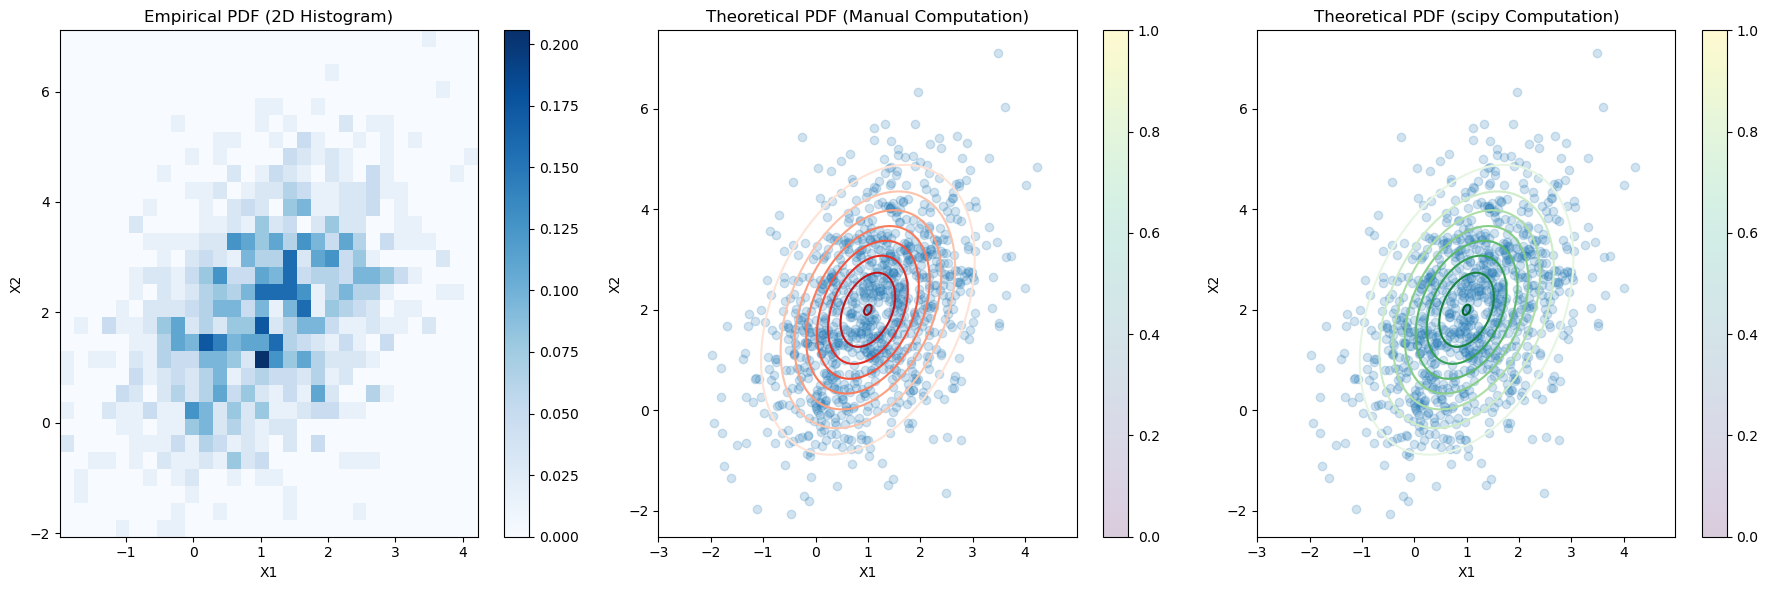

Difference between manual and scipy computed PDF values (Frobenius norm): 5.495801018243371e-15


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean vector and covariance matrix
mu = np.array([1, 2])  # Example mean vector
C = np.array([[1, 0.5], [0.5, 2]])  # Example covariance matrix

# Number of samples to generate
num_samples = 1000

# Simulate the Gaussian random vector
samples = np.random.multivariate_normal(mu, C, num_samples)

# Create a grid of points to evaluate the theoretical PDF
x, y = np.mgrid[-3:5:.01, -2:6:.01]
pos = np.dstack((x, y))

# Compute the theoretical PDF using the given formula
def theoretical_pdf(x, mu, C):
    n = mu.size
    det_C = np.linalg.det(C)
    inv_C = np.linalg.inv(C)
    norm_const = 1 / (np.sqrt((2 * np.pi)**n * det_C))
    diff = x - mu
    exponent = -0.5 * np.sum(diff @ inv_C * diff, axis=-1)
    return norm_const * np.exp(exponent)

# Evaluate the theoretical PDF on the grid using the given formula
theoretical_pdf_values_manual = theoretical_pdf(pos, mu, C)

# Compute the theoretical PDF using scipy's multivariate_normal
rv = multivariate_normal(mu, C)
theoretical_pdf_values_scipy = rv.pdf(pos)

# Plot the empirical PDF using a 2D histogram
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist2d(samples[:, 0], samples[:, 1], bins=30, density=True, cmap='Blues')
plt.title('Empirical PDF (2D Histogram)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()

# Plot the theoretical PDF as a contour plot (manual computation)
plt.subplot(1, 3, 2)
plt.contour(x, y, theoretical_pdf_values_manual, levels=10, cmap='Reds')
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2)
plt.title('Theoretical PDF (Manual Computation)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()

# Plot the theoretical PDF as a contour plot (scipy computation)
plt.subplot(1, 3, 3)
plt.contour(x, y, theoretical_pdf_values_scipy, levels=10, cmap='Greens')
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2)
plt.title('Theoretical PDF (scipy Computation)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()

plt.tight_layout()
plt.show()

# Compute the difference between the manually computed and scipy computed PDFs
pdf_diff = np.linalg.norm(theoretical_pdf_values_manual - theoretical_pdf_values_scipy)

print("Difference between manual and scipy computed PDF values (Frobenius norm):", pdf_diff)


## Comapre with (marginal) scalar RV

In the given code, $X_1$ and $X_2$ are Gaussian random variables with the following properties:

**Mean**
- $X_1$ has a mean of 1.
- $X_2$ has a mean of 2.

**Covariance Matrix**  

The covariance matrix $\vec{C}$ is defined as:

$$ \vec{C} = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 2 \end{bmatrix} $$

**Variance**

The variance of each random variable $X_i$ is given by the diagonal elements of the covariance matrix $\vec{C}$:
- The variance of $X_1$ (the first diagonal element) is 1.
- The variance of $X_2$ (the second diagonal element) is 2.

**Correlation**

The off-diagonal elements of the covariance matrix represent the covariance between $X_1$ and $X_2$. In this case, the covariance between $X_1$ and $X_2$ is 0.5, indicating that they are positively correlated.

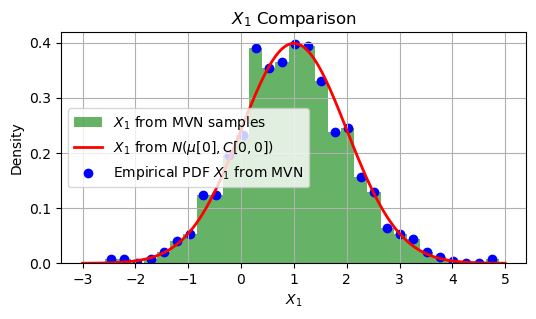

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Define the mean vector and covariance matrix
mu = np.array([1, 2])  # Example mean vector
C = np.array([[1, 0.5], [0.5, 2]])  # Example covariance matrix

# Number of samples to generate
num_samples = 1000

# Simulate the Gaussian random vector
samples = np.random.multivariate_normal(mu, C, num_samples)

# Extract X1 from the samples of the MVN
X1_from_MVN = samples[:, 0]

# Generate X1 from a scalar normal distribution N(mu[0], C[0,0])
X1_scalar = np.random.normal(mu[0], np.sqrt(C[0, 0]), num_samples)

# Create a range of values for X1 to compute the PDFs
x_values = np.linspace(-3, 5, 1000)

# Compute the theoretical PDF of X1 from the MVN samples
pdf_X1_from_MVN, bins = np.histogram(X1_from_MVN, bins=30, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Compute the theoretical PDF of X1 from the scalar normal distribution
pdf_X1_scalar = norm.pdf(x_values, mu[0], np.sqrt(C[0, 0]))

# Plot the PDFs
plt.figure(figsize=(6, 3))

plt.hist(X1_from_MVN, bins=30, density=True, alpha=0.6, color='g', label='$X_1$ from MVN samples')
plt.plot(x_values, pdf_X1_scalar, 'r', linewidth=2, label='$X_1$ from $N(\mu[0], C[0,0])$')
plt.scatter(bin_centers, pdf_X1_from_MVN, color='blue', label='Empirical PDF $X_1$ from MVN')

plt.title('$X_1$ Comparison')
plt.xlabel('$X_1$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


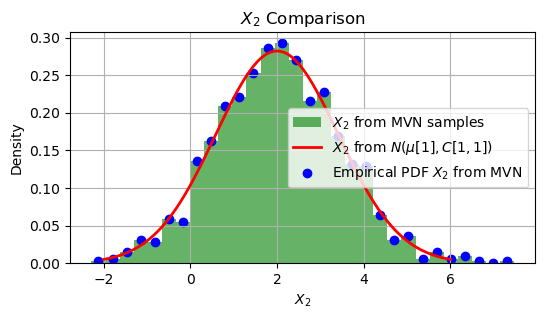

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Define the mean vector and covariance matrix
mu = np.array([1, 2])  # Example mean vector
C = np.array([[1, 0.5], [0.5, 2]])  # Example covariance matrix

# Number of samples to generate
num_samples = 1000

# Simulate the Gaussian random vector
samples = np.random.multivariate_normal(mu, C, num_samples)

# Extract X2 from the samples of the MVN
X2_from_MVN = samples[:, 1]

# Generate X2 from a scalar normal distribution N(mu[1], C[1,1])
X2_scalar = np.random.normal(mu[1], np.sqrt(C[1, 1]), num_samples)

# Create a range of values for X2 to compute the PDFs
x_values = np.linspace(-2, 6, 1000)

# Compute the theoretical PDF of X2 from the MVN samples
pdf_X2_from_MVN, bins = np.histogram(X2_from_MVN, bins=30, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Compute the theoretical PDF of X2 from the scalar normal distribution
pdf_X2_scalar = norm.pdf(x_values, mu[1], np.sqrt(C[1, 1]))

# Plot the PDFs
plt.figure(figsize=(6, 3))

plt.hist(X2_from_MVN, bins=30, density=True, alpha=0.6, color='g', label='$X_2$ from MVN samples')
plt.plot(x_values, pdf_X2_scalar, 'r', linewidth=2, label='$X_2$ from $N(\mu[1], C[1,1])$')
plt.scatter(bin_centers, pdf_X2_from_MVN, color='blue', label='Empirical PDF $X_2$ from MVN')

plt.title('$X_2$ Comparison')
plt.xlabel('$X_2$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## Covariance Matrix Discussion

An elaboration on the covariance between $ X_1 $ and $ X_2 $ can be better understood through the scatter plot, which visually represents the relationship between these two variables.

**Covariance Definition**

Covariance measures the degree to which two variables change together. If $ X_1 $ and $ X_2 $ tend to increase or decrease together, their covariance is positive. Conversely, if one variable tends to increase when the other decreases, their covariance is negative.

**Interpreting the Scatter Plot**

In the scatter plot, each point represents a sample pair $(X_1, X_2)$. Key points to consider include:

- **Positive Covariance**: An upward-sloping pattern in the points indicates a positive covariance, where both variables tend to increase together.
- **Negative Covariance**: A downward-sloping pattern suggests a negative covariance, where one variable decreases as the other increases.
- **Zero Covariance**: A random scattering of points without a discernible pattern suggests that the covariance is close to zero, indicating no linear relationship between the variables.

**Visual Clues in the Scatter Plot**

- A slight upward trend in the scatter plot suggests a positive covariance.
- The lack of perfect alignment of points indicates that the relationship, while present, is not perfectly linear.

**Example Calculation**

For instance, if the calculated empirical covariance is approximately 0.5, this aligns with the theoretical covariance. This quantitative value supports the observation of a positive relationship in the scatter plot.

Theoretical Covariance between X1 and X2: 0.5
Empirical Covariance between X1 and X2: 0.4393110910393278


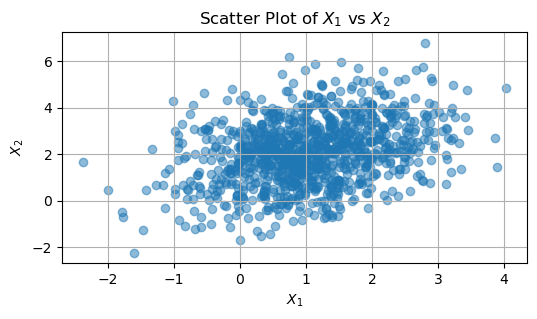

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

# Define the mean vector and covariance matrix
mu = np.array([1, 2])  # Example mean vector
C = np.array([[1, 0.5], [0.5, 2]])  # Example covariance matrix

# Number of samples to generate
num_samples = 1000

# Simulate the Gaussian random vector
samples = np.random.multivariate_normal(mu, C, num_samples)

# Extract X1 and X2 from the samples of the MVN
X1_from_MVN = samples[:, 0]
X2_from_MVN = samples[:, 1]

# Compute the empirical covariance matrix from the samples
empirical_cov_matrix = np.cov(X1_from_MVN, X2_from_MVN)

# Extract the empirical covariance between X1 and X2
empirical_cov_X1_X2 = empirical_cov_matrix[0, 1]

# Print the theoretical and empirical covariance
print("Theoretical Covariance between X1 and X2:", C[0, 1])
print("Empirical Covariance between X1 and X2:", empirical_cov_X1_X2)

# Plot the scatter plot of X1 and X2 to visualize the covariance
plt.figure(figsize=(6, 3))
plt.scatter(X1_from_MVN, X2_from_MVN, alpha=0.5)
plt.title('Scatter Plot of $X_1$ vs $X_2$')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()


## Standard Gaussian Vector

A standard Gaussian vector $\vec{\mathbf{w}} \in \mathbb{R}^n$ consists of $n$ independent and identically distributed (iid) standard Gaussian elements, meaning each element has a mean of 0 and a variance of 1:

$$
\vec{\mathbf{w}} \sim \mathcal{N}(0, \vec{I})
$$

where $\vec{I}$ is the identity matrix.

The PDF of $\vec{\mathbf{w}}$ is given by:

$$
f_{\vec{\mathbf{w}}}(\vec{w}) = \frac{1}{(2\pi)^{n/2}} e^{-\frac{\Vert\vec{w}\Vert^2}{2}}
$$

- **Normalization Factor**:

  $$
  \frac{1}{(2\pi)^{n/2}}
  $$

  This normalizes the n-dimensional space for a standard Gaussian distribution.

- **Exponential Term**:

  $$
  e^{-\frac{\Vert\vec{w}\Vert^2}{2}}
  $$
  
  Here, $\Vert\vec{w}\Vert^2 = \vec{w}^{\mathsf{T}} \vec{w}$ is the squared Euclidean norm (or magnitude) of the vector $\vec{\mathbf{w}}$.


For a standard Gaussian vector $\vec{\mathbf{w}} \in \mathbb{R}^n$, the mean vector and covariance matrix are defined as follows:

**Mean Vector** 

The mean vector of a standard Gaussian vector is a zero vector of length $n$:

$$ \vec{\mu} = \vec{0} = [0, 0, \ldots, 0]^{\mathsf{T}} $$

**Covariance Matrix**

The covariance matrix of a standard Gaussian vector is the identity matrix of size $n \times n$:

$$ \vec{C} = \vec{I} = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix} $$

This means that each element of the vector $\vec{\mathbf{w}}$ is independently distributed with a mean of 0 and a variance of 1, and there are no correlations between the elements.


Sample Mean:
 [ 0.04578892 -0.01906378]
Sample Covariance:
 [[ 0.99258943 -0.02881532]
 [-0.02881532  1.0013519 ]]


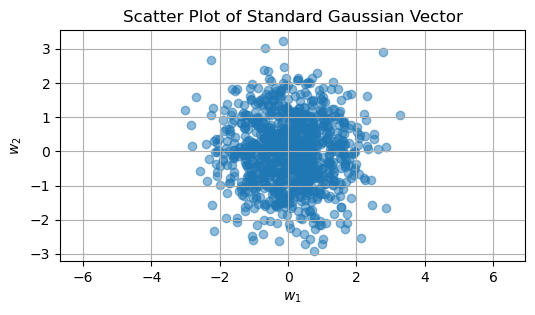

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimension of the vector and number of samples
n = 2  # Dimension of the Gaussian vector
num_samples = 1000

# Simulate the standard Gaussian vector
samples = np.random.standard_normal((num_samples, n))

# Verify the mean and covariance of the generated samples
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print("Sample Mean:\n", sample_mean)
print("Sample Covariance:\n", sample_cov)

# Plot the scatter plot of the samples
plt.figure(figsize=(6, 3))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title('Scatter Plot of Standard Gaussian Vector')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.grid(True)
plt.axis('equal')
plt.show()


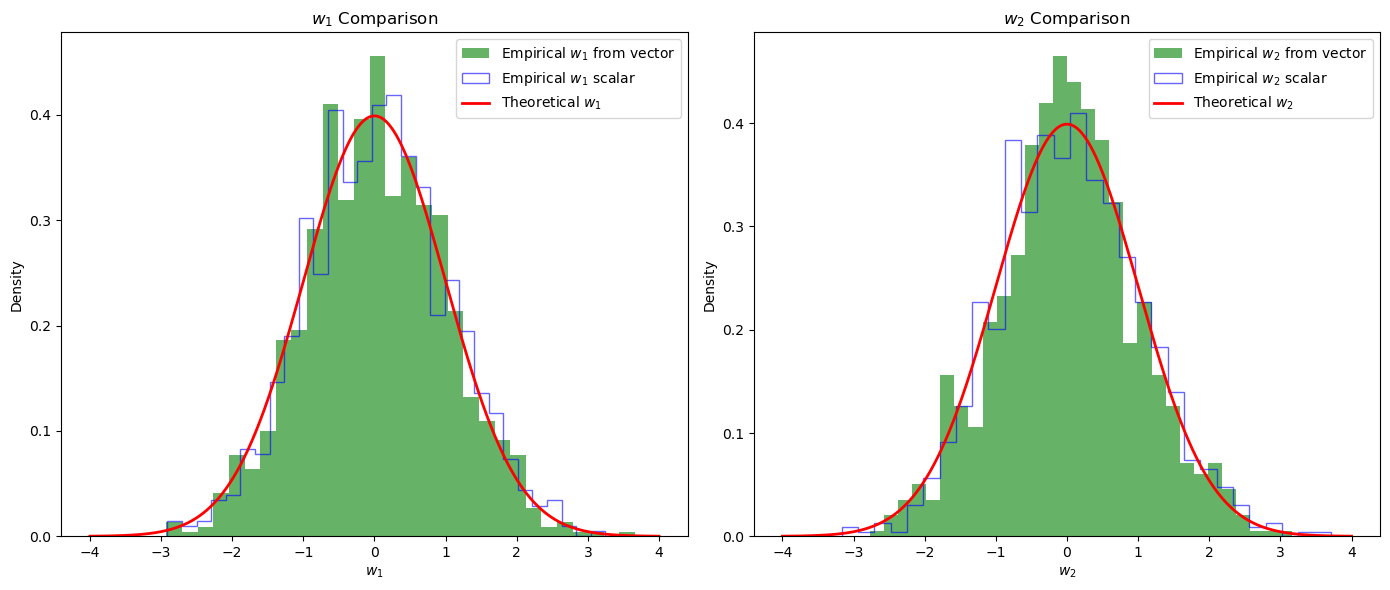

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the dimension of the vector and number of samples
n = 2  # Dimension of the Gaussian vector
num_samples = 1000

# Simulate the standard Gaussian vector
samples = np.random.standard_normal((num_samples, n))

# Extract w1 and w2 from the samples of the standard Gaussian vector
w1_from_vector = samples[:, 0]
w2_from_vector = samples[:, 1]

# Simulate w1 and w2 as independent standard Gaussian random variables
w1_scalar = np.random.standard_normal(num_samples)
w2_scalar = np.random.standard_normal(num_samples)

# Create a range of values to compute the theoretical PDFs
x_values = np.linspace(-4, 4, 1000)

# Compute the theoretical PDFs
pdf_w1 = norm.pdf(x_values, 0, 1)
pdf_w2 = norm.pdf(x_values, 0, 1)

# Plot the empirical histograms and theoretical PDFs
plt.figure(figsize=(14, 6))

# Plot for w1
plt.subplot(1, 2, 1)
plt.hist(w1_from_vector, bins=30, density=True, alpha=0.6, color='g', label='Empirical $w_1$ from vector')
plt.hist(w1_scalar, bins=30, density=True, alpha=0.6, color='b', label='Empirical $w_1$ scalar', histtype='step')
plt.plot(x_values, pdf_w1, 'r', linewidth=2, label='Theoretical $w_1$')
plt.title('$w_1$ Comparison')
plt.xlabel('$w_1$')
plt.ylabel('Density')
plt.legend()

# Plot for w2
plt.subplot(1, 2, 2)
plt.hist(w2_from_vector, bins=30, density=True, alpha=0.6, color='g', label='Empirical $w_2$ from vector')
plt.hist(w2_scalar, bins=30, density=True, alpha=0.6, color='b', label='Empirical $w_2$ scalar', histtype='step')
plt.plot(x_values, pdf_w2, 'r', linewidth=2, label='Theoretical $w_2$')
plt.title('$w_2$ Comparison')
plt.xlabel('$w_2$')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


## PDF of Standard Gaussian Vector

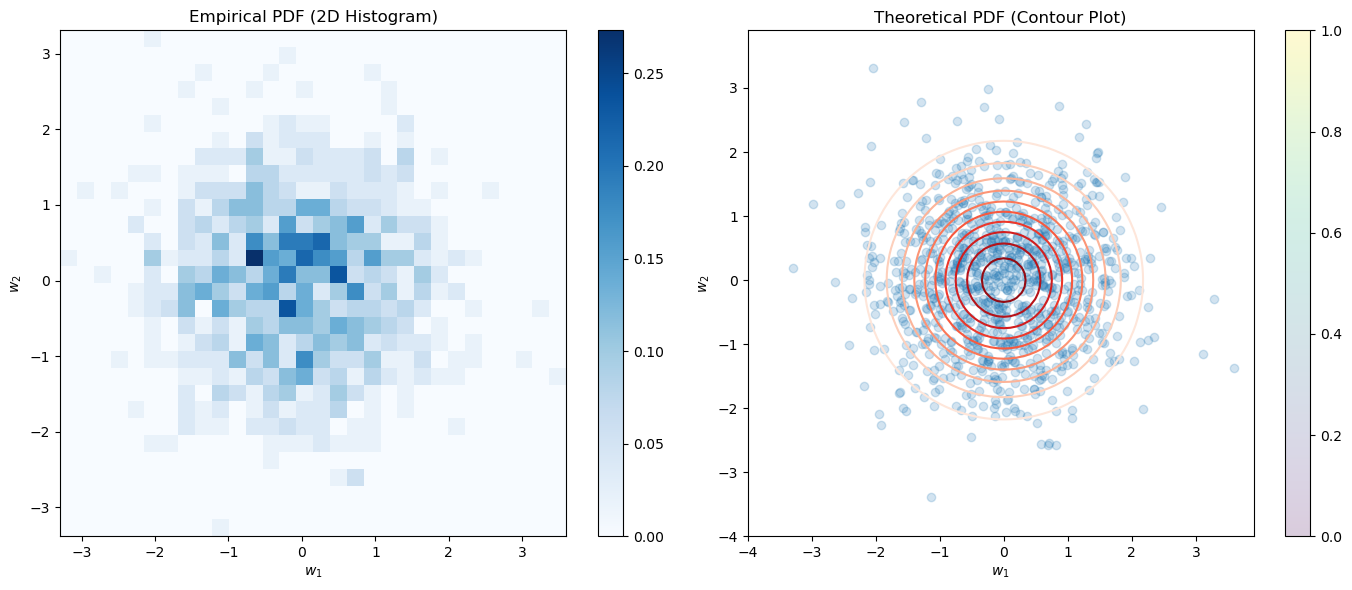

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the dimension of the vector and number of samples
n = 2  # Dimension of the Gaussian vector
num_samples = 1000

# Simulate the standard Gaussian vector
samples = np.random.standard_normal((num_samples, n))

# Create a grid of points to evaluate the theoretical PDF
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))

# Compute the theoretical PDF using the given formula
def theoretical_pdf(w):
    norm_const = 1 / (2 * np.pi)**(n / 2)
    exp_term = np.exp(-0.5 * np.sum(w**2, axis=-1))
    return norm_const * exp_term

# Evaluate the theoretical PDF on the grid
theoretical_pdf_values = theoretical_pdf(pos)

# Plot the empirical PDF using a 2D histogram
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist2d(samples[:, 0], samples[:, 1], bins=30, density=True, cmap='Blues')
plt.title('Empirical PDF (2D Histogram)')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.colorbar()

# Plot the theoretical PDF as a contour plot
plt.subplot(1, 2, 2)
plt.contour(x, y, theoretical_pdf_values, levels=10, cmap='Reds')
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2)
plt.title('Theoretical PDF (Contour Plot)')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.colorbar()

plt.tight_layout()
plt.show()


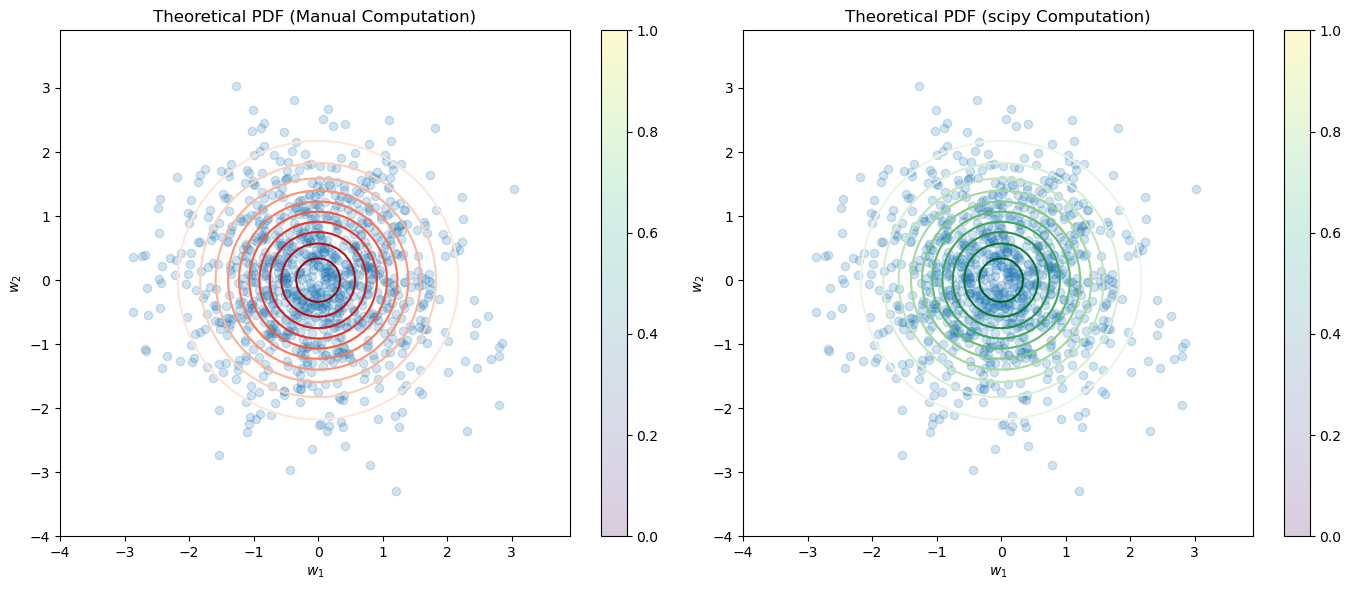

Difference between manual and scipy computed PDF values (Frobenius norm): 4.898299368705921e-16


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the dimension of the vector and number of samples
n = 2  # Dimension of the Gaussian vector
num_samples = 1000

# Simulate the standard Gaussian vector
samples = np.random.standard_normal((num_samples, n))

# Create a grid of points to evaluate the theoretical PDF
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))

# Compute the theoretical PDF using the given formula
def theoretical_pdf(w):
    norm_const = 1 / (2 * np.pi)**(n / 2)
    exp_term = np.exp(-0.5 * np.sum(w**2, axis=-1))
    return norm_const * exp_term

# Evaluate the theoretical PDF on the grid using the given formula
theoretical_pdf_values_manual = theoretical_pdf(pos)

# Compute the theoretical PDF using scipy's multivariate_normal
rv = multivariate_normal(mean=np.zeros(n), cov=np.eye(n))
theoretical_pdf_values_scipy = rv.pdf(pos)

# Plot the empirical PDF using a 2D histogram
plt.figure(figsize=(14, 6))


# Plot the theoretical PDF as a contour plot (manual computation)
plt.subplot(1, 2, 1)
plt.contour(x, y, theoretical_pdf_values_manual, levels=10, cmap='Reds')
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2)
plt.title('Theoretical PDF (Manual Computation)')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.colorbar()

# Plot the theoretical PDF as a contour plot (scipy computation)
plt.subplot(1, 2, 2)
plt.contour(x, y, theoretical_pdf_values_scipy, levels=10, cmap='Greens')
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2)
plt.title('Theoretical PDF (scipy Computation)')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.colorbar()

plt.tight_layout()
plt.show()

# Compute the difference between the manually computed and scipy computed PDFs
pdf_diff = np.linalg.norm(theoretical_pdf_values_manual - theoretical_pdf_values_scipy)

print("Difference between manual and scipy computed PDF values (Frobenius norm):", pdf_diff)


## Dependence of the PDF of Standard Gaussian Vector on Magnitudes

For a standard Gaussian vector $\vec{\mathbf{w}} \in \mathbb{R}^n$, the PDF depends solely on the magnitude (or norm) of $\vec{\mathbf{w}}$. This property arises because each component of $\vec{\mathbf{w}}$ is independently and identically distributed (iid) with a standard normal distribution. 

**PDF of the Standard Gaussian Vector**

The PDF of a standard Gaussian vector is given by:

$$ f_{\vec{\mathbf{w}}}(\vec{w}) = \frac{1}{(2\pi)^{n/2}} e^{-\frac{\Vert\vec{w}\Vert^2}{2}} $$

where $ \Vert\vec{w}\Vert^2 = \vec{w}^{\mathsf{T}} \vec{w} $ is the squared Euclidean norm of the vector $\vec{w}$.

**Dependence on Magnitude**

The term $ \Vert\vec{w}\Vert^2 = \sum_{i=1}^{n} w_i^2 $ is the sum of the squares of the individual components of the vector. Because the exponent in the PDF expression is $-\frac{\Vert\vec{w}\Vert^2}{2}$, it is evident that the PDF is a function of the magnitude of $\vec{\mathbf{w}}$ alone and not its direction. This isotropic property implies that all directions in $\mathbb{R}^n$ are equally probable, and the probability density depends only on how far $\vec{\mathbf{w}}$ is from the origin.

**Expected Output**

- The histogram shows the empirical distribution of magnitudes of the samples from the standard Gaussian vector.
- The red line represents the theoretical PDF of the magnitudes.
- The empirical distribution should closely match the theoretical distribution, confirming that the PDF of the standard Gaussian vector depends solely on the magnitude of $\vec{\mathbf{w}}$.

This demonstration illustrates that the PDF of a standard Gaussian vector is a function of the magnitude of the vector, confirming its isotropic property.

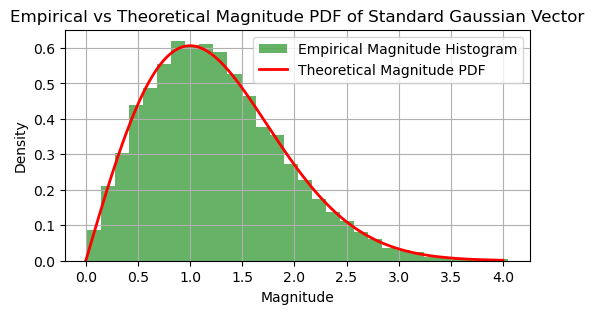

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi

# Define the dimension of the vector and number of samples
n = 2  # Dimension of the Gaussian vector
num_samples = 10000

# Simulate the standard Gaussian vector
samples = np.random.standard_normal((num_samples, n))

# Compute the magnitudes of the samples
magnitudes = np.linalg.norm(samples, axis=1)

# Create a range of values for the magnitudes
magnitude_values = np.linspace(0, 4, 1000)

# Compute the theoretical distribution of magnitudes
# For n=2, the distribution of magnitudes is a Chi distribution with 2 degrees of freedom
theoretical_pdf_magnitudes = chi.pdf(magnitude_values, df=n)

# Plot the empirical histogram of the magnitudes
plt.figure(figsize=(6, 3))
plt.hist(magnitudes, bins=30, density=True, alpha=0.6, color='g', label='Empirical Magnitude Histogram')
plt.plot(magnitude_values, theoretical_pdf_magnitudes, 'r', linewidth=2, label='Theoretical Magnitude PDF')
plt.title('Empirical vs Theoretical Magnitude PDF of Standard Gaussian Vector')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## Explanation of Orthonormal Transformations and Gaussian Vectors

### Orthonormal Transform

An orthonormal transform $\vec{O}$ is a square matrix whose columns (and rows) are orthonormal vectors. This means:

$$ \vec{O}^{\mathsf{T}} \vec{O} = \vec{I} $$

where $\vec{O}^{\mathsf{T}}$ is the transpose of $\vec{O}$ and $\vec{I}$ is the identity matrix.

**Invariance Under Orthonormal Transformations**

For a standard Gaussian vector $\vec{\mathbf{w}} \sim \mathcal{N}(0, \vec{I})$, applying an orthonormal transform $\vec{O}$ to $\vec{\mathbf{w}}$ yields:

$$ \vec{O} \vec{\mathbf{w}} $$

Since $\vec{O}$ is orthonormal, the transformed vector $\vec{O} \vec{\mathbf{w}}$ remains a standard Gaussian vector. This is because the covariance matrix of $\vec{O} \vec{\mathbf{w}}$ is still the identity matrix $\vec{I}$. Let's see why this is true.

**Proof of Invariance**

- **Mean of $\vec{O} \vec{\mathbf{w}}$**:

   $$ E[\vec{O} \vec{\mathbf{w}}] = \vec{O} E[\vec{\mathbf{w}}] = \vec{O} \vec{0} = \vec{0} $$

- **Covariance of $\vec{O} \vec{\mathbf{w}}$**:

   $$ \text{Cov}(\vec{O} \vec{\mathbf{w}}) = E[(\vec{O} \vec{\mathbf{w}})(\vec{O} \vec{\mathbf{w}})^{\mathsf{T}}] - E[\vec{O} \vec{\mathbf{w}}] E[\vec{O} \vec{\mathbf{w}}]^{\mathsf{T}} $$

   Since $ E[\vec{O} \vec{\mathbf{w}}] = \vec{0} $,

   $$ \text{Cov}(\vec{O} \vec{\mathbf{w}}) = E[(\vec{O} \vec{\mathbf{w}})(\vec{O} \vec{\mathbf{w}})^{\mathsf{T}}] = \vec{O} E[\vec{\mathbf{w}} \vec{\mathbf{w}}^{\mathsf{T}}] \vec{O}^{\mathsf{T}} $$

   Because $\vec{\mathbf{w}}$ is standard normal, $E[\vec{\mathbf{w}} \vec{\mathbf{w}}^{\mathsf{T}}] = \vec{I}$,
   
   $$ \text{Cov}(\vec{O} \vec{\mathbf{w}}) = \vec{O} \vec{I} \vec{O}^{\mathsf{T}} = \vec{O} \vec{O}^{\mathsf{T}} = \vec{I} $$

Therefore, $\vec{O} \vec{\mathbf{w}} \sim \mathcal{N}(0, \vec{I})$. This proves that $\vec{\mathbf{w}}$ is invariant under orthonormal transformations, meaning $\vec{\mathbf{w}}$ maintains its properties regardless of rotations of the coordinate system.

**Independence of Projections**

The projections of a standard Gaussian vector onto orthonormal directions are independent. This is because:

- **Orthonormal Projections**: When we project $\vec{\mathbf{w}}$ onto an orthonormal basis, each projection is a linear combination of independent standard normal variables.
- **Independence**: Since the basis vectors are orthonormal, the projections retain the property of independence.

**Generalization to Zero Mean and Variance $\sigma^2$**

For a vector of iid Gaussian elements with zero mean and variance $\sigma^2$:

$$ \vec{\mathbf{w}} \sim \mathcal{N}(0, \sigma^2 \vec{I}) $$

The results can be generalized as follows:

- **Mean**: The mean vector remains $\vec{0}$ after the transformation.
- **Covariance**: The covariance matrix of the transformed vector is:

   $$ \text{Cov}(\vec{O} \vec{\mathbf{w}}) = \vec{O} \text{Cov}(\vec{\mathbf{w}}) \vec{O}^{\mathsf{T}} = \vec{O} (\sigma^2 \vec{I}) \vec{O}^{\mathsf{T}} = \sigma^2 \vec{O} \vec{I} \vec{O}^{\mathsf{T}} = \sigma^2 \vec{I} $$

Thus, $\vec{O} \vec{\mathbf{w}} \sim \mathcal{N}(0, \sigma^2 \vec{I})$, confirming the invariance under orthonormal transformations and the independence of projections.

Rotation Matrix O:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

O^T * O:
 [[ 1.00000000e+00 -1.01465364e-17]
 [-1.01465364e-17  1.00000000e+00]]
Sample Mean (Transformed):
 [0.03224222 0.00041806]
Sample Covariance (Transformed):
 [[ 1.07938291 -0.01550949]
 [-0.01550949  1.05266536]]


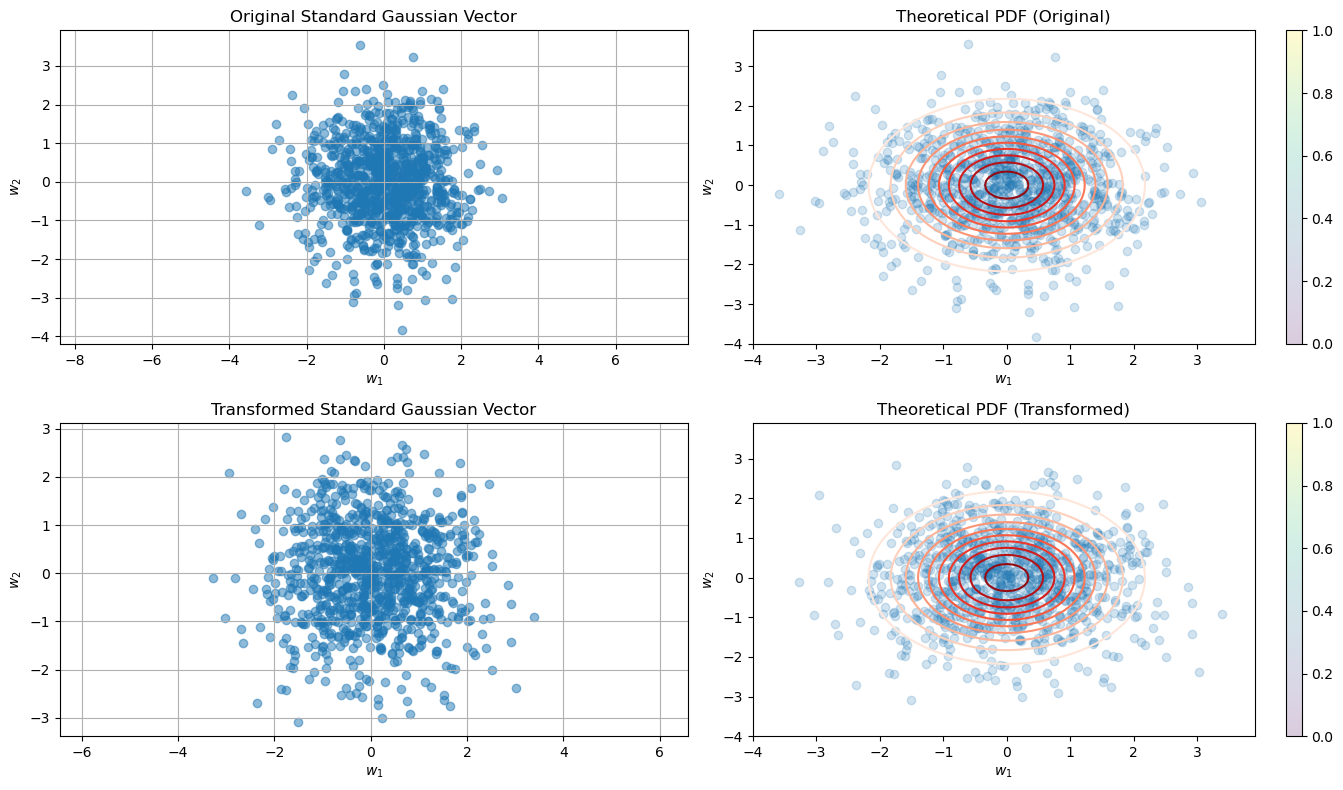

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the dimension of the vector and number of samples
n = 2  # Dimension of the Gaussian vector
num_samples = 1000

# Simulate the standard Gaussian vector
w = np.random.standard_normal((num_samples, n))

# Define the rotation angle theta
theta = np.pi / 4  # 45 degrees rotation

# Define the rotation matrix O
O = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Compute the transpose of O
O_T = O.T

# Verify if O^T * O equals the identity matrix
identity_check = np.dot(O_T, O)

# Print the rotation matrix and the result of O^T * O
print("Rotation Matrix O:\n", O)
print("\nO^T * O:\n", identity_check)

# Transform the standard Gaussian vector
w_transformed = w @ O.T

# Verify the mean and covariance of the transformed samples
sample_mean_transformed = np.mean(w_transformed, axis=0)
sample_cov_transformed = np.cov(w_transformed, rowvar=False)

print("Sample Mean (Transformed):\n", sample_mean_transformed)
print("Sample Covariance (Transformed):\n", sample_cov_transformed)

# Create a grid of points to evaluate the theoretical PDFs
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))

# Compute the theoretical PDF using scipy's multivariate_normal
rv = multivariate_normal(mean=np.zeros(n), cov=np.eye(n))
theoretical_pdf_original = rv.pdf(pos)
theoretical_pdf_transformed = rv.pdf(pos)

# Plot the scatter plot and PDF of the original and transformed samples
plt.figure(figsize=(14, 8))

# Original Standard Gaussian Vector
plt.subplot(2, 2, 1)
plt.scatter(w[:, 0], w[:, 1], alpha=0.5)
plt.title('Original Standard Gaussian Vector')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.grid(True)
plt.axis('equal')

plt.subplot(2, 2, 2)
plt.contour(x, y, theoretical_pdf_original, levels=10, cmap='Reds')
plt.scatter(w[:, 0], w[:, 1], alpha=0.2)
plt.title('Theoretical PDF (Original)')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.colorbar()

# Transformed Standard Gaussian Vector
plt.subplot(2, 2, 3)
plt.scatter(w_transformed[:, 0], w_transformed[:, 1], alpha=0.5)
plt.title('Transformed Standard Gaussian Vector')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.grid(True)
plt.axis('equal')

plt.subplot(2, 2, 4)
plt.contour(x, y, theoretical_pdf_transformed, levels=10, cmap='Reds')
plt.scatter(w_transformed[:, 0], w_transformed[:, 1], alpha=0.2)
plt.title('Theoretical PDF (Transformed)')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.colorbar()

plt.tight_layout()
plt.show()


## Orthonormal Matrix and Rotation Matrix

**Orthonormal Matrix**

An orthonormal matrix is a square matrix whose columns (and rows) are orthonormal vectors. This means that each column (or row) of the matrix has unit length and is orthogonal to the other columns (or rows). Mathematically, for a matrix $\vec{O}$ to be orthonormal, it must satisfy:

$$ \vec{O}^{\mathsf{T}} \vec{O} = \vec{I} $$

where $\vec{O}^{\mathsf{T}}$ is the transpose of $\vec{O}$ and $\vec{I}$ is the identity matrix.

**Rotation Matrix**

A rotation matrix is a specific type of orthonormal matrix that rotates vectors in a plane. For a 2D rotation matrix $\vec{O}$ that rotates vectors by an angle $\theta$, the matrix is given by:

$$ \vec{O} = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix} $$

This matrix rotates vectors counterclockwise by the angle $\theta$ in the 2D plane.

**Verifying the Orthonormal Property**

Let's verify that the given rotation matrix is orthonormal:

$$ \vec{O} = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix} $$

To check if $\vec{O}$ is orthonormal, we need to verify that $\vec{O}^{\mathsf{T}} \vec{O} = \vec{I}$ as demostration in the following simulation.

Rotation Matrix O:
 [[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]

O^T * O:
 [[1. 0.]
 [0. 1.]]
Sample Mean (Transformed):
 [-0.06306295  0.01722892]
Sample Covariance (Transformed):
 [[ 1.03001108 -0.02122173]
 [-0.02122173  0.97231493]]


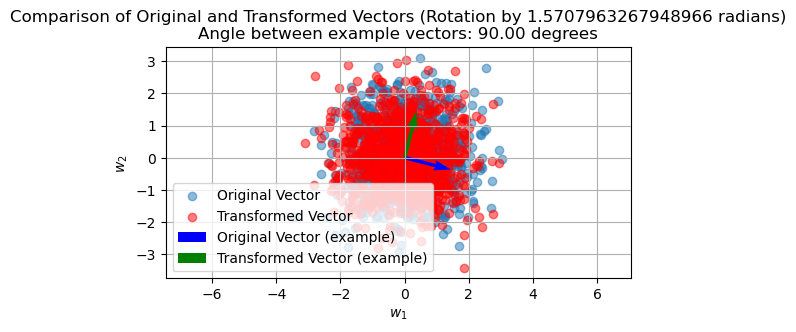

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the dimension of the vector and number of samples
n = 2  # Dimension of the Gaussian vector
num_samples = 1000

# Simulate the standard Gaussian vector
w = np.random.standard_normal((num_samples, n))

# Define the rotation angle theta
theta = np.pi / 2  # 45 degrees rotation

# Define the rotation matrix O
O = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Compute the transpose of O
O_T = O.T

# Verify if O^T * O equals the identity matrix
identity_check = np.dot(O_T, O)

# Print the rotation matrix and the result of O^T * O
print("Rotation Matrix O:\n", O)
print("\nO^T * O:\n", identity_check)

# Transform the standard Gaussian vector
w_transformed = w @ O.T

# Verify the mean and covariance of the transformed samples
sample_mean_transformed = np.mean(w_transformed, axis=0)
sample_cov_transformed = np.cov(w_transformed, rowvar=False)

print("Sample Mean (Transformed):\n", sample_mean_transformed)
print("Sample Covariance (Transformed):\n", sample_cov_transformed)

# Create a grid of points to evaluate the theoretical PDFs
x, y = np.mgrid[-4:4:.1, -4:4:.1]
pos = np.dstack((x, y))

# Select one original and transformed vector for angle measurement
original_vector = w[0]
transformed_vector = w_transformed[0]

# Calculate the angle between the original and transformed vector
dot_product = np.dot(original_vector, transformed_vector)
norm_original = np.linalg.norm(original_vector)
norm_transformed = np.linalg.norm(transformed_vector)
cos_theta = dot_product / (norm_original * norm_transformed)
angle = np.arccos(cos_theta)

# Convert angle from radians to degrees
angle_degrees = np.degrees(angle)

# Plot to compare original vector with transformed vector to show rotation
plt.figure(figsize=(6, 3))
plt.scatter(w[:, 0], w[:, 1], alpha=0.5, label='Original Vector')
plt.scatter(w_transformed[:, 0], w_transformed[:, 1], alpha=0.5, label='Transformed Vector', color='r')
plt.quiver(0, 0, original_vector[0], original_vector[1], angles='xy', scale_units='xy', scale=1, color='b', label='Original Vector (example)')
plt.quiver(0, 0, transformed_vector[0], transformed_vector[1], angles='xy', scale_units='xy', scale=1, color='g', label='Transformed Vector (example)')
plt.legend()
plt.title(f'Comparison of Original and Transformed Vectors (Rotation by {theta} radians)\nAngle between example vectors: {angle_degrees:.2f} degrees')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.grid(True)
plt.axis('equal')
plt.show()


## Gaussian Vector Transformation

If $ \vec{\mathbf{x}} \sim \mathcal{N}(\vec{\mu}_{\mathbf{x}}, \vec{C}_{\mathbf{x}}) $, it means that $ \vec{\mathbf{x}} $ is a multivariate normal (Gaussian) random vector with mean vector $ \vec{\mu}_{\mathbf{x}} $ and covariance matrix $ \vec{C}_{\mathbf{x}} $.

### Linear Transformation

A linear transformation of $ \vec{\mathbf{x}} $ is defined by:

$$
\vec{\mathbf{y}} = \vec{A} \vec{\mathbf{x}} + \vec{b}
$$

where:
- $ \vec{A} $ is a matrix that defines the linear transformation.
- $ \vec{b} $ is a vector that defines the translation.

The resulting vector $ \vec{\mathbf{y}} $ is also a Gaussian vector. The new mean vector and covariance matrix can be derived as follows:

### Mean of $ \vec{\mathbf{y}} $

Given the transformation of $ \vec{\mathbf{x}} $ as

$$
\vec{\mathbf{y}} = \vec{A} \vec{\mathbf{x}} + \vec{b}
$$

the expected value of $ \vec{\mathbf{y}} $ is obtained as

$$
E[\vec{\mathbf{y}}] = E[\vec{A} \vec{\mathbf{x}} + \vec{b}]
$$

Since expectation is linear:

$$
E[\vec{\mathbf{y}}] = \vec{A} E[\vec{\mathbf{x}}] + E[\vec{b}]
$$

Because $ \vec{b} $ is a constant vector:

$$
E[\vec{\mathbf{y}}] = \vec{A} \vec{\mu}_{\mathbf{x}} + \vec{b}
$$

### Covariance of $ \vec{\mathbf{y}} $

The covariance of $ \vec{\mathbf{y}} $ is defined as

$$
\text{Cov}(\vec{\mathbf{y}}) = E[(\vec{\mathbf{y}} - E[\vec{\mathbf{y}}])(\vec{\mathbf{y}} - E[\vec{\mathbf{y}}])^{\mathsf{T}}]
$$

which can be further expressed as

$$
\vec{\mathbf{y}} - E[\vec{\mathbf{y}}] = \vec{A} \vec{\mathbf{x}} + \vec{b} - (\vec{A} \vec{\mu}_{\mathbf{x}} + \vec{b})
$$

$$
\vec{\mathbf{y}} - E[\vec{\mathbf{y}}] = \vec{A} (\vec{\mathbf{x}} - \vec{\mu}_{\mathbf{x}})
$$

Substituting the above expression, we have

$$
\text{Cov}(\vec{\mathbf{y}}) = E[\vec{A} (\vec{\mathbf{x}} - \vec{\mu}_{\mathbf{x}}) (\vec{\mathbf{x}} - \vec{\mu}_{\mathbf{x}})^{\mathsf{T}} \vec{A}^{\mathsf{T}}]
$$

Since $ \vec{A} $ is constant:

$$
\text{Cov}(\vec{\mathbf{y}}) = \vec{A} E[(\vec{\mathbf{x}} - \vec{\mu}_{\mathbf{x}}) (\vec{\mathbf{x}} - \vec{\mu}_{\mathbf{x}})^{\mathsf{T}}] \vec{A}^{\mathsf{T}}
$$

Thus, the covariance is expressed as

$$
\text{Cov}(\vec{\mathbf{y}}) = \vec{A} \vec{C}_{\mathbf{x}} \vec{A}^{\mathsf{T}}
$$

The new Gaussian vector $ \vec{\mathbf{y}} $ resulting from the linear transformation $ \vec{\mathbf{y}} = \vec{A} \vec{\mathbf{x}} + \vec{b} $ has the following properties:

- **Mean**: $ \vec{A} \vec{\mu}_{\mathbf{x}} + \vec{b} $
- **Covariance**: $ \vec{A} \vec{C}_{\mathbf{x}} \vec{A}^{\mathsf{T}} $

The statistical description of $ \vec{\mathbf{y}} $ can be denoted as:

$$
\vec{\mathbf{y}} \sim \mathcal{N}(\vec{A} \vec{\mu}_{\mathbf{x}} + \vec{b}, \vec{A} \vec{C}_{\mathbf{x}} \vec{A}^{\mathsf{T}})
$$

Theoretical Mean (Transformed):
 [4.  1.5]
Sample Mean (Transformed):
 [3.96156312 1.49230059]

Theoretical Covariance (Transformed):
 [[5.5   3.125]
 [3.125 2.75 ]]
Sample Covariance (Transformed):
 [[5.24843114 2.89710839]
 [2.89710839 2.50403537]]


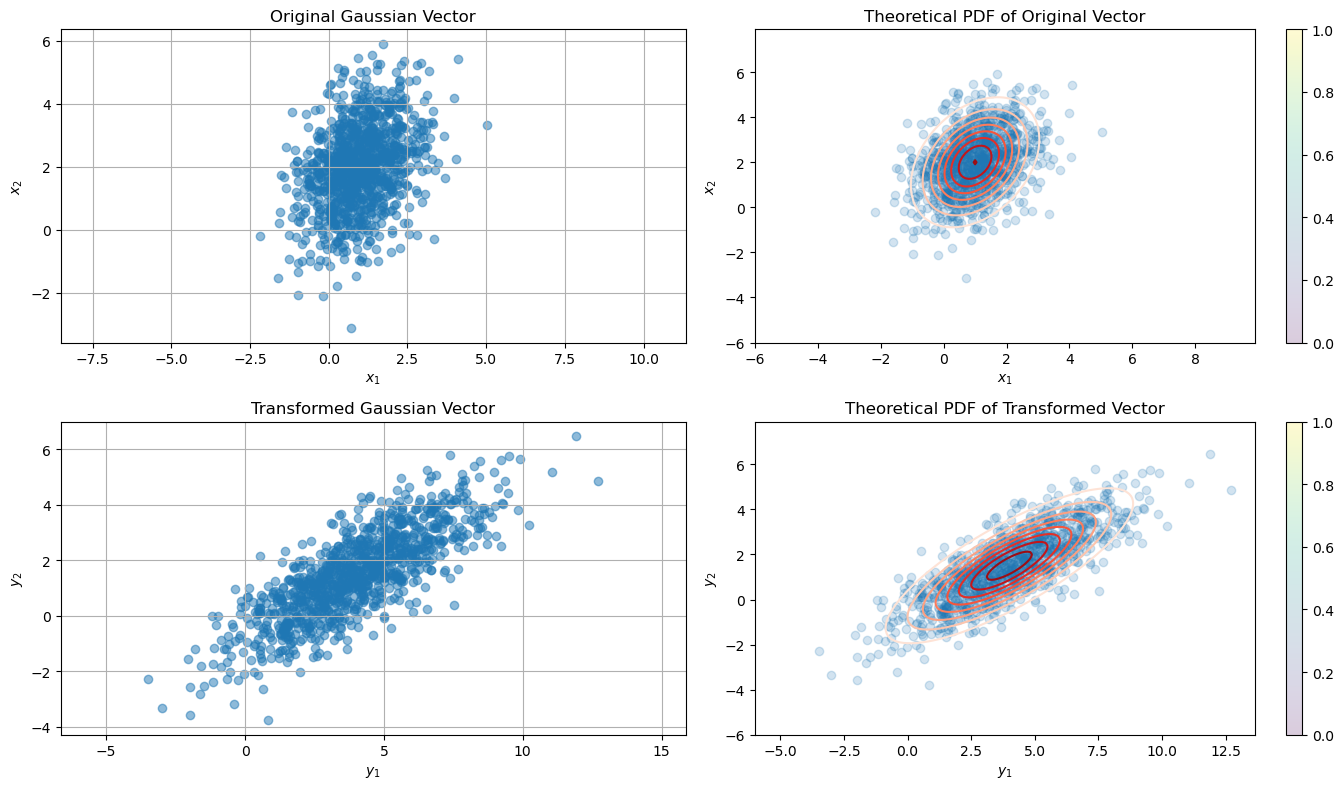

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define parameters for the original Gaussian vector
mu_X = np.array([1, 2])  # Mean vector of x
C_X = np.array([[1, 0.5], [0.5, 2]])  # Covariance matrix of x

# Number of samples to generate
num_samples = 1000

# Simulate the original Gaussian vector x
x = np.random.multivariate_normal(mu_X, C_X, num_samples)

# Define the linear transformation parameters
A = np.array([[2, 0.5], [0.5, 1]])
b = np.array([1, -1])

# Apply the linear transformation
y = np.dot(x, A.T) + b

# Calculate the mean and covariance of the transformed vector y
mu_y = np.dot(A, mu_X) + b
C_y = np.dot(A, np.dot(C_X, A.T))

# Verify the mean and covariance of the transformed samples
sample_mean_y = np.mean(y, axis=0)
sample_cov_y = np.cov(y, rowvar=False)

print("Theoretical Mean (Transformed):\n", mu_y)
print("Sample Mean (Transformed):\n", sample_mean_y)
print("\nTheoretical Covariance (Transformed):\n", C_y)
print("Sample Covariance (Transformed):\n", sample_cov_y)

# Create a grid of points to evaluate the theoretical PDFs
x_grid, y_grid = np.mgrid[-6:10:.1, -6:8:.1]
pos = np.dstack((x_grid, y_grid))

# Compute the theoretical PDF of the original and transformed vectors
rv_X = multivariate_normal(mean=mu_X, cov=C_X)
theoretical_pdf_X = rv_X.pdf(pos)

rv_y = multivariate_normal(mean=mu_y, cov=C_y)
theoretical_pdf_y = rv_y.pdf(pos)

# Plot the scatter plot and PDF of the original and transformed samples
plt.figure(figsize=(14, 8))

# Original Gaussian Vector
plt.subplot(2, 2, 1)
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
plt.title('Original Gaussian Vector')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.axis('equal')

plt.subplot(2, 2, 2)
plt.contour(x_grid, y_grid, theoretical_pdf_X, levels=10, cmap='Reds')
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.title('Theoretical PDF of Original Vector')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar()

# Transformed Gaussian Vector
plt.subplot(2, 2, 3)
plt.scatter(y[:, 0], y[:, 1], alpha=0.5)
plt.title('Transformed Gaussian Vector')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.grid(True)
plt.axis('equal')

plt.subplot(2, 2, 4)
plt.contour(x_grid, y_grid, theoretical_pdf_y, levels=10, cmap='Reds')
plt.scatter(y[:, 0], y[:, 1], alpha=0.2)
plt.title('Theoretical PDF of Transformed Vector')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.colorbar()

plt.tight_layout()
plt.show()
